In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sb
import pandas as pd
from scipy.spatial import distance_matrix
from random import sample
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
#!pip install pyclustertend
from pyclustertend import vat

In [3]:
data = pd.read_csv("C:/Users/shubhamv/Downloads/RBIdata.csv")

In [4]:
data = pd.DataFrame(data)

In [5]:
data.head(7)

,Unnamed: 0,BirthRate,MortalitityRate,PowerAvailability,RoadLength
0,Andaman & Nicobar Islands,12.0,20,473.8,1352
1,Andhra Pradesh,16.8,37,1019.8,179022
2,Arunachal Pradesh,18.8,30,427.5,25362
3,Assam,22.0,47,265.4,326512
4,Bihar,26.3,42,227.9,206010
5,Chandigarh,13.7,21,1523.7,2935
6,Chhattisgarh,23.2,41,991.0,97534


In [13]:
data.rename(columns={'Unnamed: 0' :'States'}, inplace = True)

In [14]:
data.head(4)

,States,BirthRate,MortalitityRate,PowerAvailability,RoadLength
0,Andaman & Nicobar Islands,12.0,20,473.8,1352
1,Andhra Pradesh,16.8,37,1019.8,179022
2,Arunachal Pradesh,18.8,30,427.5,25362
3,Assam,22.0,47,265.4,326512


In [15]:
data.set_index('States',inplace=True)

In [16]:
data.head()

,BirthRate,MortalitityRate,PowerAvailability,RoadLength
States,,,,
Andaman & Nicobar Islands,12.0,20,473.8,1352
Andhra Pradesh,16.8,37,1019.8,179022
Arunachal Pradesh,18.8,30,427.5,25362
Assam,22.0,47,265.4,326512
Bihar,26.3,42,227.9,206010


In [17]:
# take 10 random samples

In [20]:
sample = data.sample(frac=0.29,replace=False,random_state=123)

In [21]:
len(sample)

10

In [22]:
sample

,BirthRate,MortalitityRate,PowerAvailability,RoadLength
States,,,,
Chhattisgarh,23.2,41,991.0,97534
Daman & Diu,17.1,18,9620.8,522
Himachal Pradesh,16.3,28,1277.3,55593
Gujarat,20.4,33,1714.7,182287
Chandigarh,13.7,21,1523.7,2935
Tripura,14.7,20,312.2,37384
Mizoram,16.2,32,417.0,9831
Telangana,17.8,34,1415.5,100251
Haryana,20.9,36,1871.1,46287


In [23]:
# Distance matrix

In [24]:
DM = pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)

In [25]:
round(DM,2)

States,Chhattisgarh,Daman & Diu,Himachal Pradesh,Gujarat,Chandigarh,Tripura,Mizoram,Telangana,Haryana,Lakshadweep
States,,,,,,,,,,
Chhattisgarh,0.00,97395.08,41941.98,84756.09,94600.50,60153.83,87704.88,2749.98,51254.56,97320.31
Daman & Diu,97395.08,0.00,55699.45,181936.86,8449.00,38019.17,13090.75,100065.98,46416.52,8881.14
Himachal Pradesh,41941.98,55699.45,0.00,126694.76,52658.58,18234.56,45770.09,44658.21,9324.93,55381.56
Gujarat,84756.09,181936.86,126694.76,0.00,179352.10,144909.79,172460.88,82036.55,136000.09,182075.58
Chandigarh,94600.50,8449.00,52658.58,179352.10,0.00,34470.30,6984.25,97316.06,43353.40,2830.23
Tripura,60153.83,38019.17,18234.56,144909.79,34470.30,0.00,27553.20,62876.68,9038.47,37172.52
Mizoram,87704.88,13090.75,45770.09,172460.88,6984.25,27553.20,0.00,90425.51,36484.99,9622.60
Telangana,2749.98,100065.98,44658.21,82036.55,97316.06,62876.68,90425.51,0.00,53965.92,100039.25
Haryana,51254.56,46416.52,9324.93,136000.09,43353.40,9038.47,36484.99,53965.92,0.00,46086.76


In [26]:
# plot distance matrix

<function matplotlib.pyplot.show(*args, **kw)>

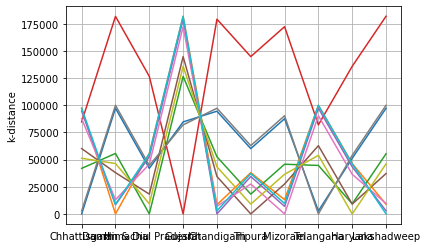

In [27]:
plt.plot(DM)
plt.ylabel("k-distance")
plt.grid(True)
plt.show

In [28]:
# visualize distance matrix 


In [29]:
from pyclustertend import vat

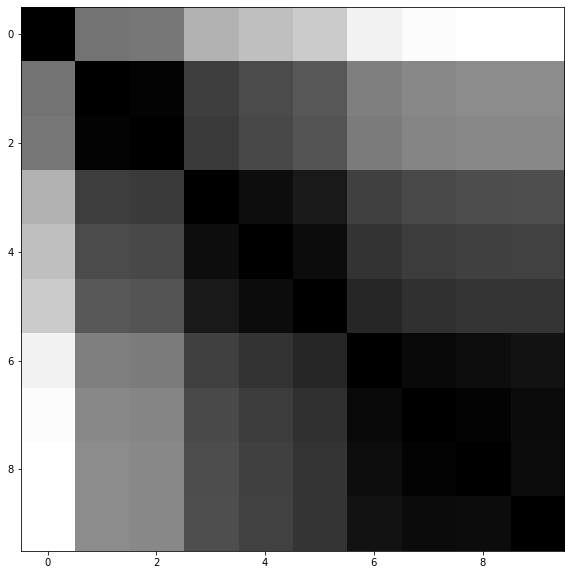

In [30]:
vat(sample)

In [31]:
# lets scale the data

In [32]:
data_scaled = StandardScaler().fit_transform(data)

In [33]:
data_scaled

array([[-1.51357482, -0.68327644, -0.39716756, -0.87187953],
       [-0.35526778,  0.78396981, -0.21894484,  0.36094475],
       [ 0.12736015,  0.17980959, -0.41228059, -0.7052779 ],
       [ 0.89956484,  1.64705583, -0.4651925 ,  1.38435473],
       [ 1.93721489,  1.21551282, -0.47743307,  0.54821025],
       [-1.10334108, -0.59696784, -0.0544642 , -0.86089534],
       [ 1.1891416 ,  1.12920422, -0.2283456 , -0.20448771],
       [ 1.74416372, -0.59696784,  5.08912198, -0.87525874],
       [-0.28287359, -0.85589364,  2.5885527 , -0.87763877],
       [-0.45179337, -0.85589364,  0.02456093, -0.65875296],
       [-1.34465504, -1.63267107,  0.59441667, -0.7797872 ],
       [ 0.51346249,  0.4387354 ,  0.00788111,  0.38360007],
       [ 0.63411948,  0.69766121,  0.05893246, -0.56008261],
       [-0.47592477,  0.00719238, -0.13489291, -0.49550973],
       [-0.50005616, -0.16542482, -0.18669501, -0.60997983],
       [ 1.26153579,  0.35242679, -0.47697609, -0.58493754],
       [-0.08982242,  0.

In [34]:
# how many clusters can be good 

In [35]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [44]:
wcss=[]

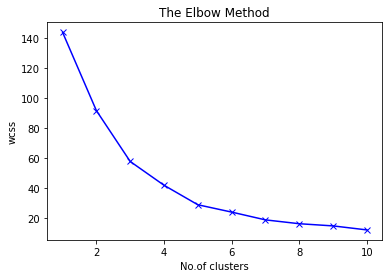

In [45]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show()
    

In [46]:
# cluster membership 

In [47]:
kmeans = KMeans(n_clusters=4)

In [48]:
clusters = kmeans.fit_predict(data_scaled)

In [49]:
clusters

array([2, 0, 0, 3, 3, 2, 3, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 3, 0, 2,
       3, 0, 2, 3, 2, 2, 3, 2, 0, 0, 2, 3, 0, 0])

In [50]:
# lets add column 'cluster' to data

In [57]:
Final_Clusters = clusters + 1

In [58]:
cluster = list(Final_Clusters)

In [59]:
data['cluster']=cluster # addition of column to data set

In [61]:
data.head(3)

,BirthRate,MortalitityRate,PowerAvailability,RoadLength,cluster
States,,,,,
Andaman & Nicobar Islands,12.0,20,473.8,1352,3
Andhra Pradesh,16.8,37,1019.8,179022,1
Arunachal Pradesh,18.8,30,427.5,25362,1


In [66]:
# Cluster 1

In [65]:
data[data['cluster']==1]

,BirthRate,MortalitityRate,PowerAvailability,RoadLength,cluster
States,,,,,
Andhra Pradesh,16.8,37,1019.8,179022,1
Arunachal Pradesh,18.8,30,427.5,25362,1
Gujarat,20.4,33,1714.7,182287,1
Haryana,20.9,36,1871.1,46287,1
Himachal Pradesh,16.3,28,1277.3,55593,1
Jharkhand,23.5,32,229.3,42705,1
Karnataka,17.9,28,997.4,321808,1
Maharashtra,16.3,21,1258.0,608140,1
Mizoram,16.2,32,417.0,9831,1


In [67]:
# cluster 2

In [69]:
data[data['cluster']==2]

,BirthRate,MortalitityRate,PowerAvailability,RoadLength,cluster
States,,,,,
Dadra& Nagar Haveli,25.5,21,17281.5,865,2
Daman & Diu,17.1,18,9620.8,522,2


In [70]:
# cluster 3

In [72]:
data[data['cluster']==3]

,BirthRate,MortalitityRate,PowerAvailability,RoadLength,cluster
States,,,,,
Andaman & Nicobar Islands,12.0,20,473.8,1352,3
Chandigarh,13.7,21,1523.7,2935,3
Delhi,16.4,18,1765.8,32067,3
Goa,12.7,9,3511.6,14624,3
Jammu and Kashmir,16.2,26,1118.6,39096,3
Kerala,14.8,12,694.7,194854,3
Lakshadweep,14.7,20,745.0,214,3
Manipur,14.4,9,297.6,24247,3
Nagaland,14.8,12,372.6,37176,3


In [73]:
# cluster 4

In [74]:
data[data['cluster']==4]

,BirthRate,MortalitityRate,PowerAvailability,RoadLength,cluster
States,,,,,
Assam,22.0,47,265.4,326512,4
Bihar,26.3,42,227.9,206010,4
Chhattisgarh,23.2,41,991.0,97534,4
Madhya Pradesh,25.5,50,859.2,288931,4
Meghalaya,23.7,42,581.6,13372,4
Odisha,19.2,46,634.1,283692,4
Rajasthan,24.8,43,979.4,248156,4
Uttar Pradesh,26.7,46,466.1,415383,4


In [75]:
# cluster profiling

In [83]:
data.groupby('cluster').mean()

,BirthRate,MortalitityRate,PowerAvailability,RoadLength
cluster,,,,
1,17.953846,30.000000,1056.615385,168563.692308
2,21.300000,19.500000,13451.150000,693.500000
3,14.646154,16.846154,1170.538462,38449.153846
4,23.925000,44.625000,625.587500,234948.750000


In [84]:
# plot clusters

In [85]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

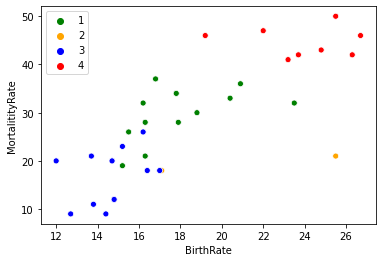

In [89]:
sb.scatterplot(data['BirthRate'],data['MortalitityRate'],hue=Final_Clusters,
              palette=['green','orange','blue','red'])

In [90]:
# silhouette score

In [92]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [94]:
cluster_labels = np.unique(clusters)

In [95]:
n_clusters = cluster_labels.shape[0]

In [96]:
silhouette_vals = silhouette_samples(data_scaled,clusters,
                                    metric='euclidean')

In [97]:
y_ax_lower,y_ax_upper=0,0

In [98]:
yticks=[]

In [ ]:
for i, c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[clusters==c]
    